# 1.NSCLC Sex-stratified SC Analysis

## Data selection, pseudobulk, create input for DESEQ2

In [1]:
import warnings
import numpy as np
import pandas as pd 
import scanpy as sc
#import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import altair as alt
#import pertpy as pt
#from pandas.api.types import is_categorical_dtype
#from pandas import CategoricalDtype

In [2]:
import decoupler as dc

/home/kvalem/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Set result directory for figures
resDir = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/011_analysis_paired_remove_xy/figures/"
sc.settings.figdir = resDir

In [4]:
dc.__version__

'1.8.0'

In [5]:
path = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp"
input_path    = f"{path}/data/local.h5ad"

In [6]:
adata = sc.read_h5ad(input_path) 

In [7]:
adata

AnnData object with n_obs × n_vars = 1283972 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts'

In [8]:
adata.obs.dataset.value_counts()

dataset
Kim_Lee_2020                                        175526
Adams_Kaminski_2020                                 131092
Leader_Merad_2021_10x_3p_v2_beads                   121265
UKIM-V-2                                            102115
Chen_Zhang_2020                                      93035
He_Fan_2021                                          88876
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite     68436
Leader_Merad_2021_10x_3p_v2_beads_cite               62468
Wu_Zhou_2021                                         58981
Madissoon_Meyer_2020                                 46116
Lambrechts_Thienpont_2018_6149v2                     40141
Habermann_Kropski_2020                               36727
Goveia_Carmeliet_2020                                36368
Reyfman_Misharin_2018                                34535
Laughney_Massague_2020                               26403
Zilionis_Klein_2019                                  25652
Lambrechts_Thienpont_2018_6653                  

In [9]:
nsclc_chrom = pd.read_csv(f"{path}/out/007_re_analysis/tables/input/adata_var_nsclc_chrom.csv")

In [10]:
adata

AnnData object with n_obs × n_vars = 1283972 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts'

In [11]:
adata.obs.disease.value_counts()

disease
lung adenocarcinoma                      704834
normal                                   212889
squamous cell lung carcinoma             190199
non-small cell lung carcinoma            120796
chronic obstructive pulmonary disease     55254
Name: count, dtype: int64

In [12]:
adata.obs.tumor_stage.value_counts()

tumor_stage
early         725412
advanced      288981
non-cancer    268143
Name: count, dtype: int64

In [13]:
adata.obs.sex.value_counts()

sex
male       676587
female     571042
unknown     36343
Name: count, dtype: int64

In [14]:
adata.obs.origin.value_counts()

origin
tumor_primary       585138
normal_adjacent     345211
normal              281363
tumor_metastasis     71272
nan                    988
Name: count, dtype: int64

In [15]:
adata.obs.dataset.value_counts()

dataset
Kim_Lee_2020                                        175526
Adams_Kaminski_2020                                 131092
Leader_Merad_2021_10x_3p_v2_beads                   121265
UKIM-V-2                                            102115
Chen_Zhang_2020                                      93035
He_Fan_2021                                          88876
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite     68436
Leader_Merad_2021_10x_3p_v2_beads_cite               62468
Wu_Zhou_2021                                         58981
Madissoon_Meyer_2020                                 46116
Lambrechts_Thienpont_2018_6149v2                     40141
Habermann_Kropski_2020                               36727
Goveia_Carmeliet_2020                                36368
Reyfman_Misharin_2018                                34535
Laughney_Massague_2020                               26403
Zilionis_Klein_2019                                  25652
Lambrechts_Thienpont_2018_6653                  

### 01.SELECT ONLY male, female & tumor, normal_adjacent

In [16]:
adata = adata[(adata.obs["disease"] != "normal") & (adata.obs["disease"] != "chronic obstructive pulmonary disease")] #exclude normal and COPD samples

In [17]:
adata = adata[adata.obs["tumor_stage"].notna()] #exclude samples without tumor stage

In [18]:
adata = adata[(adata.obs["sex"]=="male")| (adata.obs["sex"]=="female")]

In [19]:
adata = adata[(adata.obs["origin"]=="tumor_primary")| (adata.obs["origin"]=="normal_adjacent")]

In [20]:
adata.obs.disease.value_counts()

disease
lung adenocarcinoma              577317
squamous cell lung carcinoma     189044
non-small cell lung carcinoma    120796
Name: count, dtype: int64

In [21]:
adata.obs.tumor_stage.value_counts()

tumor_stage
early       672760
advanced    214397
Name: count, dtype: int64

In [22]:
adata.obs.sex.value_counts()

sex
male      500302
female    386855
Name: count, dtype: int64

In [23]:
adata.obs.origin.value_counts()

origin
tumor_primary      571045
normal_adjacent    316112
Name: count, dtype: int64

In [24]:
adata.obs.dataset.value_counts()

dataset
Leader_Merad_2021_10x_3p_v2_beads                   119829
UKIM-V-2                                            102115
Chen_Zhang_2020                                      93035
He_Fan_2021                                          88876
Kim_Lee_2020                                         86310
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite     68436
Leader_Merad_2021_10x_3p_v2_beads_cite               62468
Wu_Zhou_2021                                         58981
Lambrechts_Thienpont_2018_6149v2                     40141
Goveia_Carmeliet_2020                                36368
Zilionis_Klein_2019                                  25652
Lambrechts_Thienpont_2018_6653                       22617
UKIM-V                                               20787
Leader_Merad_2021_10x_5p_v1_CD2                      14894
Leader_Merad_2021_10x_3p_v3_beads                     9646
Leader_Merad_2021_10x_3p_v2_sort                      7922
Guo_Zhang_2018                                  

### 02.CELL TPYE RE-CLASIFICATION 

In [25]:
adata.obs.cell_type.value_counts()

cell_type
CD4-positive, alpha-beta T cell         152247
CD8-positive, alpha-beta T cell         123252
alveolar macrophage                      82844
macrophage                               78660
malignant cell                           75457
natural killer cell                      50680
B cell                                   44609
classical monocyte                       43364
regulatory T cell                        33603
plasma cell                              31876
epithelial cell of lung                  23013
CD1c-positive myeloid dendritic cell     20734
neutrophil                               18706
type II pneumocyte                       16274
vein endothelial cell                    15849
mast cell                                14361
capillary endothelial cell               10870
multi-ciliated epithelial cell            6413
non-classical monocyte                    6103
myeloid cell                              5544
fibroblast of lung                        5091
bro

In [26]:
adata.obs.cell_type_major.value_counts()

cell_type_major
T cell CD4               149343
T cell CD8               120586
Macrophage alveolar       82844
Macrophage                78660
Tumor cells               75457
NK cell                   50094
Monocyte                  49467
B cell                    44307
T cell regulatory         33603
Endothelial cell          32443
Plasma cell               30292
transitional club/AT2     22894
cDC2                      20734
Neutrophils               18706
Alveolar cell type 2      16274
Mast cell                 14361
other                     14017
Stromal                   13948
Ciliated                   6413
pDC                        3800
Alveolar cell type 1       3739
cDC1                       2097
Club                       1580
DC mature                  1498
Name: count, dtype: int64

## I do not subset for specific cell types

In [27]:
#cells_of_interest=['alveolar macrophage', 'neutrophil','dendritic cell',
# 'macrophage','malignant cell',
# 'B cell',
#  'regulatory T cell',
#'CD4-positive, alpha-beta T cell',
# 'CD8-positive, alpha-beta T cell',
# 'neutrophils','epithelial cell of lung','multi-ciliated epithelial cell' ]
#subset_adata = adata[adata.obs["cell_type"].isin(cells_of_interest)] 


In [28]:
set(adata.obs.cell_type)

{'B cell',
 'CD1c-positive myeloid dendritic cell',
 'CD4-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta T cell',
 'alveolar macrophage',
 'bronchus fibroblast of lung',
 'capillary endothelial cell',
 'classical monocyte',
 'club cell',
 'conventional dendritic cell',
 'dendritic cell',
 'endothelial cell of lymphatic vessel',
 'epithelial cell of lung',
 'fibroblast of lung',
 'macrophage',
 'malignant cell',
 'mast cell',
 'mesothelial cell',
 'multi-ciliated epithelial cell',
 'myeloid cell',
 'natural killer cell',
 'neutrophil',
 'non-classical monocyte',
 'pericyte',
 'plasma cell',
 'plasmacytoid dendritic cell',
 'pulmonary artery endothelial cell',
 'regulatory T cell',
 'smooth muscle cell',
 'stromal cell',
 'type I pneumocyte',
 'type II pneumocyte',
 'vein endothelial cell'}

In [29]:
set(adata.obs.cell_type_major)

{'Alveolar cell type 1',
 'Alveolar cell type 2',
 'B cell',
 'Ciliated',
 'Club',
 'DC mature',
 'Endothelial cell',
 'Macrophage',
 'Macrophage alveolar',
 'Mast cell',
 'Monocyte',
 'NK cell',
 'Neutrophils',
 'Plasma cell',
 'Stromal',
 'T cell CD4',
 'T cell CD8',
 'T cell regulatory',
 'Tumor cells',
 'cDC1',
 'cDC2',
 'other',
 'pDC',
 'transitional club/AT2'}

In [30]:
adata.obs["cell_type"]= adata.obs["cell_type"].replace(['epithelial cell of lung','multi-ciliated epithelial cell',], 'epithelial cell')
adata.obs["cell_type"]= adata.obs["cell_type"].replace(['alveolar macrophage'], 'macrophage')
adata.obs["cell_type"]= adata.obs["cell_type"].replace(['CD4-positive, alpha-beta T cell'], 'CD4+ T cell')
adata.obs["cell_type"]= adata.obs["cell_type"].replace(['CD8-positive, alpha-beta T cell'], 'CD8+ T cell')

/tmp/ipykernel_24722/2267409685.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs["cell_type"]= adata.obs["cell_type"].replace(['epithelial cell of lung','multi-ciliated epithelial cell',], 'epithelial cell')
/tmp/ipykernel_24722/2267409685.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cell_type"]= adata.obs["cell_type"].replace(['epithelial cell of lung','multi-ciliated epithelial cell',], 'epithelial cell')
/tmp/ipykernel_24722/2267409685.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categorie

In [31]:
set(adata.obs.cell_type)

{'B cell',
 'CD1c-positive myeloid dendritic cell',
 'CD4+ T cell',
 'CD8+ T cell',
 'bronchus fibroblast of lung',
 'capillary endothelial cell',
 'classical monocyte',
 'club cell',
 'conventional dendritic cell',
 'dendritic cell',
 'endothelial cell of lymphatic vessel',
 'epithelial cell',
 'fibroblast of lung',
 'macrophage',
 'malignant cell',
 'mast cell',
 'mesothelial cell',
 'myeloid cell',
 'natural killer cell',
 'neutrophil',
 'non-classical monocyte',
 'pericyte',
 'plasma cell',
 'plasmacytoid dendritic cell',
 'pulmonary artery endothelial cell',
 'regulatory T cell',
 'smooth muscle cell',
 'stromal cell',
 'type I pneumocyte',
 'type II pneumocyte',
 'vein endothelial cell'}

In [32]:
adata

AnnData object with n_obs × n_vars = 887157 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

In [33]:
adata.obs.disease.value_counts()

disease
lung adenocarcinoma              577317
squamous cell lung carcinoma     189044
non-small cell lung carcinoma    120796
Name: count, dtype: int64

In [34]:
adata.obs.dataset.value_counts()

dataset
Leader_Merad_2021_10x_3p_v2_beads                   119829
UKIM-V-2                                            102115
Chen_Zhang_2020                                      93035
He_Fan_2021                                          88876
Kim_Lee_2020                                         86310
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite     68436
Leader_Merad_2021_10x_3p_v2_beads_cite               62468
Wu_Zhou_2021                                         58981
Lambrechts_Thienpont_2018_6149v2                     40141
Goveia_Carmeliet_2020                                36368
Zilionis_Klein_2019                                  25652
Lambrechts_Thienpont_2018_6653                       22617
UKIM-V                                               20787
Leader_Merad_2021_10x_5p_v1_CD2                      14894
Leader_Merad_2021_10x_3p_v3_beads                     9646
Leader_Merad_2021_10x_3p_v2_sort                      7922
Guo_Zhang_2018                                  

In [35]:
adata.obs.dataset.value_counts()

dataset
Leader_Merad_2021_10x_3p_v2_beads                   119829
UKIM-V-2                                            102115
Chen_Zhang_2020                                      93035
He_Fan_2021                                          88876
Kim_Lee_2020                                         86310
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite     68436
Leader_Merad_2021_10x_3p_v2_beads_cite               62468
Wu_Zhou_2021                                         58981
Lambrechts_Thienpont_2018_6149v2                     40141
Goveia_Carmeliet_2020                                36368
Zilionis_Klein_2019                                  25652
Lambrechts_Thienpont_2018_6653                       22617
UKIM-V                                               20787
Leader_Merad_2021_10x_5p_v1_CD2                      14894
Leader_Merad_2021_10x_3p_v3_beads                     9646
Leader_Merad_2021_10x_3p_v2_sort                      7922
Guo_Zhang_2018                                  

## PAIRED SAMPLES

In [36]:
df_grouped = adata.obs.groupby(["origin","donor_id"]).count()

/tmp/ipykernel_24722/1607831740.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = adata.obs.groupby(["origin","donor_id"]).count()


In [37]:
df_grouped.reset_index(inplace= True)

In [38]:
df_grouped_normal = df_grouped[df_grouped["origin"]=="normal_adjacent"]

In [39]:
df_grouped_normal = df_grouped_normal[df_grouped_normal['sample'] != 0]

In [40]:
df_grouped_tumor = df_grouped[df_grouped["origin"]=="tumor_primary"]

In [41]:
df_grouped_tumor = df_grouped_tumor[df_grouped_tumor['sample'] != 0]

In [42]:
df_grouped_tumor

,origin,donor_id,sample,uicc_stage,ever_smoker,age,dataset,ann_fine,cell_type_predicted,doublet_status,...,sex_ontology_term_id,tissue_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
168,tumor_primary,Chen_Zhang_2020_NSCLC-1,1818,1818,0,0,1818,1818,1818,1818,...,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818
169,tumor_primary,Chen_Zhang_2020_NSCLC-2,3886,3886,0,0,3886,3886,3886,3886,...,3886,3886,3886,3886,3886,3886,3886,3886,3886,3886
170,tumor_primary,Chen_Zhang_2020_NSCLC-3,7196,7196,0,0,7196,7196,7196,7196,...,7196,7196,7196,7196,7196,7196,7196,7196,7196,7196
171,tumor_primary,Chen_Zhang_2020_NSCLC-4,4039,4039,0,0,4039,4039,4039,4039,...,4039,4039,4039,4039,4039,4039,4039,4039,4039,4039
172,tumor_primary,Chen_Zhang_2020_NSCLC-5,8170,8170,0,0,8170,8170,8170,8170,...,8170,8170,8170,8170,8170,8170,8170,8170,8170,8170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,tumor_primary,Zilionis_Klein_2019_patient_3,6590,6590,0,6590,6590,6590,6590,6590,...,6590,6590,6590,6590,6590,6590,6590,6590,6590,6590
332,tumor_primary,Zilionis_Klein_2019_patient_4,3373,3373,0,3373,3373,3373,3373,3373,...,3373,3373,3373,3373,3373,3373,3373,3373,3373,3373
333,tumor_primary,Zilionis_Klein_2019_patient_5,2441,2441,0,2441,2441,2441,2441,2441,...,2441,2441,2441,2441,2441,2441,2441,2441,2441,2441
334,tumor_primary,Zilionis_Klein_2019_patient_6,3896,3896,0,3896,3896,3896,3896,3896,...,3896,3896,3896,3896,3896,3896,3896,3896,3896,3896


In [43]:
common_ids =list(set(df_grouped_normal.donor_id)& set(df_grouped_tumor.donor_id))

In [44]:
len(common_ids)

84

In [46]:
paired_adata = adata[adata.obs['donor_id'].isin(common_ids)].copy()

In [47]:
paired_adata

AnnData object with n_obs × n_vars = 660114 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

In [48]:
df = paired_adata.obs#
origin_counts = df.groupby('origin')['donor_id'].nunique().reset_index()
origin_counts.columns = ['origin', 'count']

/tmp/ipykernel_24722/2715583478.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin_counts = df.groupby('origin')['donor_id'].nunique().reset_index()


/tmp/ipykernel_24722/3457429988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_counts, x='origin', y='count', palette='viridis')


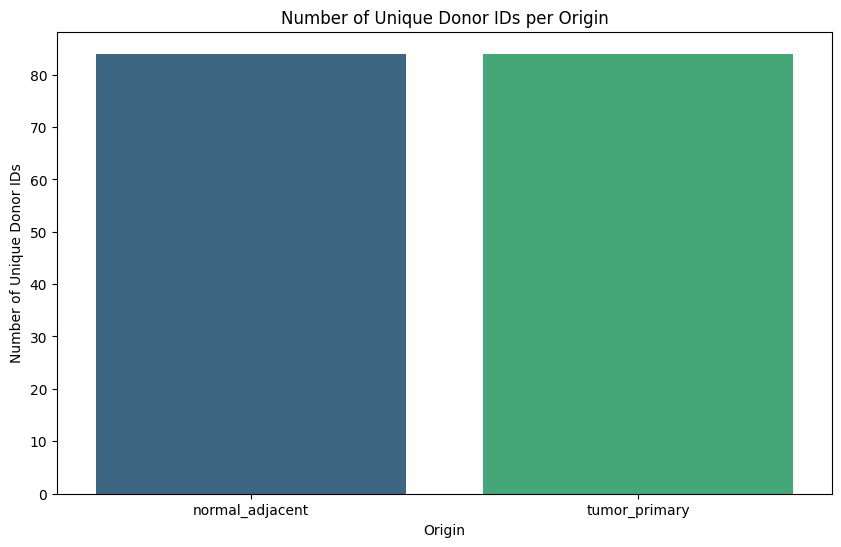

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=origin_counts, x='origin', y='count', palette='viridis')
plt.xlabel('Origin')
plt.ylabel('Number of Unique Donor IDs')
plt.title('Number of Unique Donor IDs per Origin')
plt.show()

In [50]:
df = paired_adata.obs#
origin_counts = df.groupby('disease')['donor_id'].nunique().reset_index()
origin_counts.columns = ['disease', 'count']

/tmp/ipykernel_24722/3679065484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin_counts = df.groupby('disease')['donor_id'].nunique().reset_index()


/tmp/ipykernel_24722/3057708053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_counts, x='disease', y='count', palette='viridis')


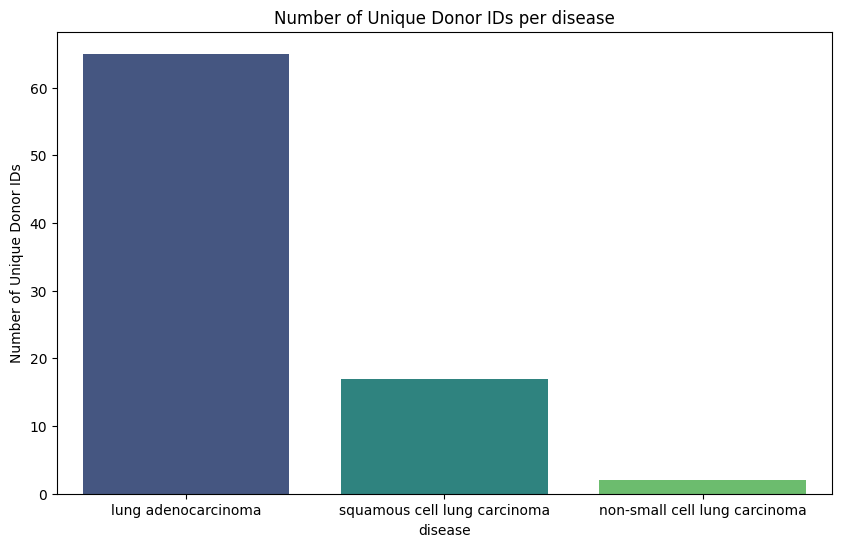

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(data=origin_counts, x='disease', y='count', palette='viridis')
plt.xlabel('disease')
plt.ylabel('Number of Unique Donor IDs')
plt.title('Number of Unique Donor IDs per disease')
plt.show()

In [52]:
paired_adata.obs.disease.value_counts()

disease
lung adenocarcinoma              495832
squamous cell lung carcinoma     137643
non-small cell lung carcinoma     26639
Name: count, dtype: int64

In [53]:
paired_adata.obs.tumor_stage.value_counts()

tumor_stage
early       580089
advanced     80025
Name: count, dtype: int64

In [54]:
paired_adata.obs.sex.value_counts()

sex
male      334693
female    325421
Name: count, dtype: int64

In [55]:
paired_adata.obs.origin.value_counts()

origin
tumor_primary      346875
normal_adjacent    313239
Name: count, dtype: int64

In [56]:
paired_adata.obs.dataset.value_counts()

dataset
Leader_Merad_2021_10x_3p_v2_beads                   113245
UKIM-V-2                                            102115
He_Fan_2021                                          88876
Kim_Lee_2020                                         70632
Leader_Merad_2021_10x_3p_v2_digest-deadcell_cite     68436
Leader_Merad_2021_10x_3p_v2_beads_cite               62468
Lambrechts_Thienpont_2018_6149v2                     40141
Goveia_Carmeliet_2020                                33606
Lambrechts_Thienpont_2018_6653                       22617
UKIM-V                                               20787
Leader_Merad_2021_10x_5p_v1_CD2                      14894
Leader_Merad_2021_10x_3p_v2_sort                      7922
Guo_Zhang_2018                                        6092
Leader_Merad_2021_10x_5p_v1_beads                     6015
Lambrechts_Thienpont_2018_6149v1                      2268
Name: count, dtype: int64

In [57]:
paired_adata

AnnData object with n_obs × n_vars = 660114 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

## Keep only  lung adenocarcinoma    

In [58]:
paired_adata_luad = paired_adata[paired_adata.obs["disease"]=="lung adenocarcinoma"]

In [59]:
paired_adata_luad

View of AnnData object with n_obs × n_vars = 495832 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_

In [60]:
df = paired_adata_luad.obs#
origin_counts = df.groupby('origin')['donor_id'].nunique().reset_index()
origin_counts.columns = ['origin', 'count']

/tmp/ipykernel_24722/3186105425.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin_counts = df.groupby('origin')['donor_id'].nunique().reset_index()


/tmp/ipykernel_24722/3457429988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_counts, x='origin', y='count', palette='viridis')


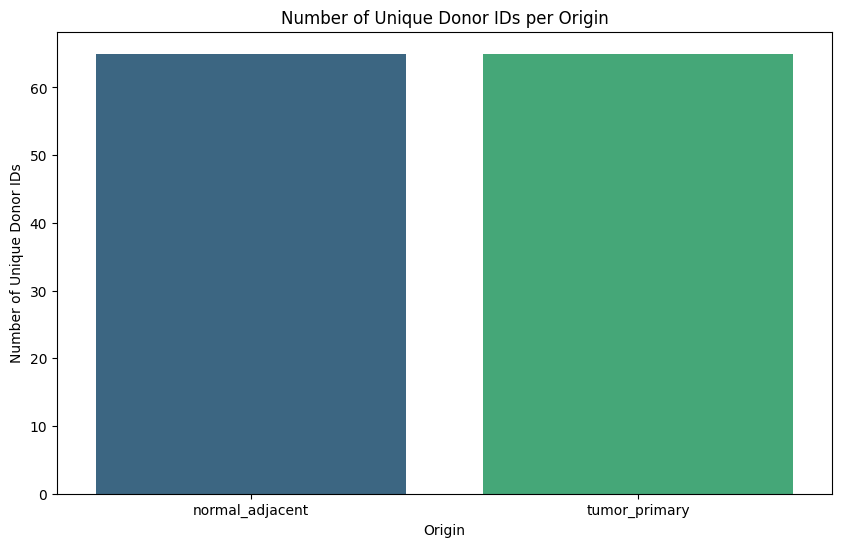

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(data=origin_counts, x='origin', y='count', palette='viridis')
plt.xlabel('Origin')
plt.ylabel('Number of Unique Donor IDs')
plt.title('Number of Unique Donor IDs per Origin')
plt.show()

In [62]:
df = paired_adata_luad.obs#
origin_counts = df.groupby('disease')['donor_id'].nunique().reset_index()
origin_counts.columns = ['disease', 'count']

/tmp/ipykernel_24722/1416590611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin_counts = df.groupby('disease')['donor_id'].nunique().reset_index()


/tmp/ipykernel_24722/3116111855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_counts, x='disease', y='count', palette='viridis')


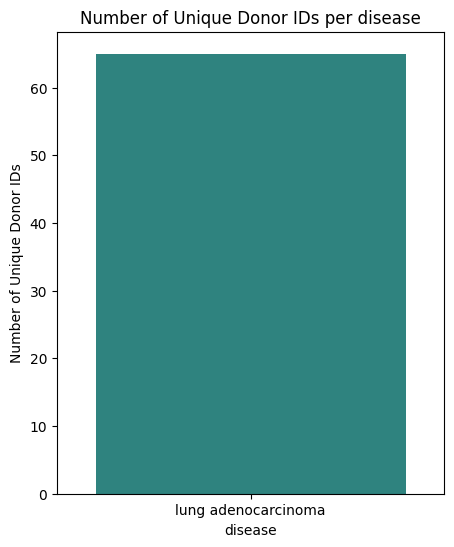

In [63]:
plt.figure(figsize=(5, 6))
sns.barplot(data=origin_counts, x='disease', y='count', palette='viridis')
plt.xlabel('disease')
plt.ylabel('Number of Unique Donor IDs')
plt.title('Number of Unique Donor IDs per disease')
plt.show()

In [64]:
paired_adata = paired_adata_luad

## Create layer Log 1pnorm 

In [65]:
paired_adata.layers["log1p_norm"] = paired_adata.X.copy()
sc.pp.normalize_total(paired_adata, target_sum=1e6, layer="log1p_norm")
sc.pp.log1p(paired_adata, base=6, layer="log1p_norm")

/tmp/ipykernel_24722/544134483.py:1: ImplicitModificationWarning: Setting element `.layers['log1p_norm']` of view, initializing view as actual.
  paired_adata.layers["log1p_norm"] = paired_adata.X.copy()


In [66]:
paired_adata

AnnData object with n_obs × n_vars = 495832 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

## Checking for XIST & RPS4Y1 in male and female

In [67]:
paired_adata.var_names = paired_adata.var.feature_name

/home/kvalem/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:864: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2ML1']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


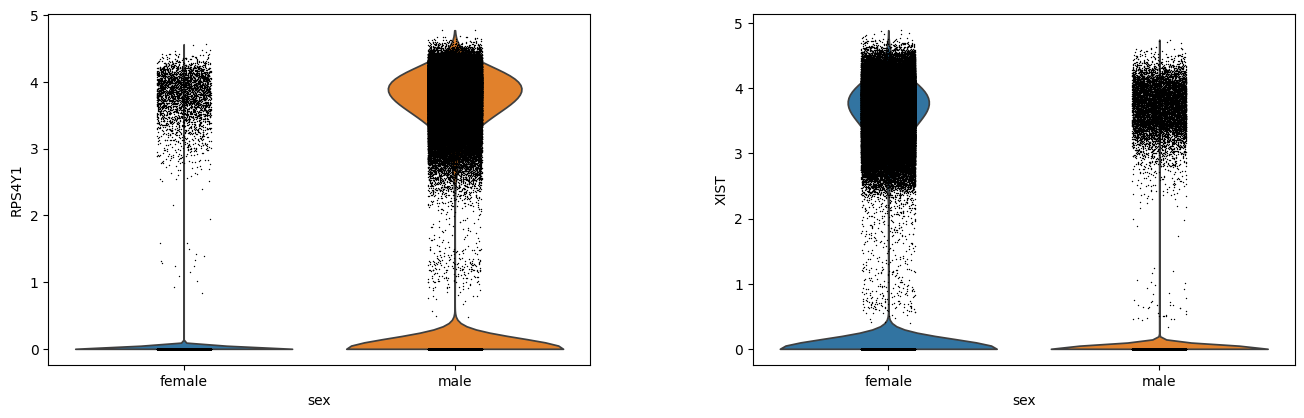

In [68]:
# Now, generate the plot and save it
sc.pl.violin(paired_adata, ["RPS4Y1", "XIST"], use_raw=False, groupby="sex", layer="log1p_norm")#, save="_xy_check.png")

In [69]:
rps4y1_cells = paired_adata[:, paired_adata.var_names == "RPS4Y1"].X > 0
# Subset the adata object to only those cells
rps4y1_paired_adata_subset = paired_adata[rps4y1_cells, :]

In [70]:
rps4y1_paired_adata_subset.obs.sex.value_counts()

sex
male      129727
female      3268
Name: count, dtype: int64

In [71]:
xist_cells = paired_adata[:, paired_adata.var_names == "XIST"].X > 0
# Subset the adata object to only those cells
xist_paired_adata_subset = paired_adata[xist_cells, :]

In [72]:
xist_paired_adata_subset.obs.sex.value_counts()

sex
female    135350
male        8717
Name: count, dtype: int64

In [73]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [74]:
rps4y1_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()

/tmp/ipykernel_24722/1444904727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rps4y1_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()


sample  uicc_stage  ever_smoker  \
sex    donor_id                                                              
female Goveia_Carmeliet_2020_patient_50         1           1            1   
       Guo_Zhang_2018_P0616P                    0           0            0   
       Guo_Zhang_2018_P0617                     0           0            0   
       Guo_Zhang_2018_P0729                     2           2            2   
       Guo_Zhang_2018_P1010                     7           7            7   
       Guo_Zhang_2018_P1120                     0           0            0   
       Guo_Zhang_2018_P1219                     7           7            7   
       He_Fan_2021_P1                          10          10           10   
       He_Fan_2021_P2                           0           0            0   
       He_Fan_2021_P3                           2           2            2   
       He_Fan_2021_P4                           0           0            0   
       Kim_Lee_2020_P0006                       0           0            0   
       Kim_Lee_2020_P0009                       0           0            0   
       Kim_Lee_2020_P0018                       0           0            0   
       Kim_Lee_2020_P0019                       0           0            0   
       Kim_Lee_2020_P0020                       0           0            0   
       Kim_Lee_2020_P0028                       0           0            0   
       Kim_Lee_2020_P0030                       0           0            0   
       Kim_Lee_2020_P0031                       0           0            0   
       Kim_Lee_2020_P0034                       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_3       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_4      52          52           52   
       Leader_Merad_2021_370                    1           1            1   
       Leader_Merad_2021_371                    0           0            0   
       Leader_Merad_2021_378                    5           5            5   
       Leader_Merad_2021_403                    0           0            0   
       Leader_Merad_2021_406                 3156        3156         3156   
       Leader_Merad_2021_408                    0           0            0   
       Leader_Merad_2021_460                    0           0            0   
       Leader_Merad_2021_532                    0           0            0   
       Leader_Merad_2021_564                    1           1            1   
       Leader_Merad_2021_569                    1           1            1   
       Leader_Merad_2021_570                    0           0            0   
       Leader_Merad_2021_572                    0           0            0   
       Leader_Merad_2021_578                    1           1            1   
       Leader_Merad_2021_581                    0           0            0   
       Leader_Merad_2021_593                    3           3            3   
       Leader_Merad_2021_596                    0           0            0   
       Leader_Merad_2021_626                    1           1            1   
       Leader_Merad_2021_630                    0           0            0   
       Leader_Merad_2021_695                    3           3            3   
       Leader_Merad_2021_729                    1           1            1   
       UKIM-V-2_P4                              1           1            1   
       UKIM-V-2_P5                              2           2            2   
       UKIM-V-2_P7                              1           1            1   
       UKIM-V-2_P9                              0           0            0   
       UKIM-V-2_P10                             3           3            3   
       UKIM-V-2_P11                             0           0            0   
       UKIM-V-2_P13                             3           3            3   
       UKIM-V-2_P14                             3           3    

In [75]:
xist_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()

/tmp/ipykernel_24722/685883600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  xist_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()


sample  uicc_stage  ever_smoker  \
sex    donor_id                                                              
female Goveia_Carmeliet_2020_patient_45      2120        2120         2120   
       Goveia_Carmeliet_2020_patient_46      3798        3798         3798   
       Goveia_Carmeliet_2020_patient_50      3145        3145         3145   
       Guo_Zhang_2018_P0616P                    0           0            0   
       Guo_Zhang_2018_P0729                   338         338          338   
       Guo_Zhang_2018_P1010                   577         577          577   
       Guo_Zhang_2018_P1118                   446         446          446   
       Guo_Zhang_2018_P1120                     0           0            0   
       Guo_Zhang_2018_P1202                   598         598          598   
       Guo_Zhang_2018_P1219                    75          75           75   
       He_Fan_2021_P1                        8593        8593         8593   
       He_Fan_2021_P2                           0           0            0   
       He_Fan_2021_P3                        5555        5555         5555   
       He_Fan_2021_P5                        4474        4474         4474   
       Kim_Lee_2020_P0008                    3638        3638         3638   
       Kim_Lee_2020_P0018                       0           0            0   
       Kim_Lee_2020_P0020                       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_3       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_4    5098        5098         5098   
       Lambrechts_Thienpont_2018_6653_6         0           0            0   
       Leader_Merad_2021_370                 1732        1732         1732   
       Leader_Merad_2021_371                    0           0            0   
       Leader_Merad_2021_378                 5169        5169         5169   
       Leader_Merad_2021_403                    0           0            0   
       Leader_Merad_2021_410                 4288        4288         4288   
       Leader_Merad_2021_458                  565         565          565   
       Leader_Merad_2021_460                    0           0            0   
       Leader_Merad_2021_464                    9           9            9   
       Leader_Merad_2021_514                 2396        2396         2396   
       Leader_Merad_2021_532                    0           0            0   
       Leader_Merad_2021_564                 5380        5380         5380   
       Leader_Merad_2021_569                 2297        2297         2297   
       Leader_Merad_2021_572                    0           0            0   
       Leader_Merad_2021_578                 3327        3327         3327   
       Leader_Merad_2021_581                    0           0            0   
       Leader_Merad_2021_593                 5204        5204         5204   
       Leader_Merad_2021_596                    0           0            0   
       Leader_Merad_2021_626                 8431        8431         8431   
       Leader_Merad_2021_630                    0           0            0   
       Leader_Merad_2021_695                21405       21405        21405   
       Leader_Merad_2021_729                 2926        2926         2926   
       UKIM-V-2_P4                           2987        2987         2987   
       UKIM-V-2_P5                           3616        3616         3616   
       UKIM-V-2_P7                           3460        3460         3460   
       UKIM-V-2_P9                              0           0            0   
       UKIM-V-2_P10                          8112        8112         8112   
       UKIM-V-2_P11                             0           0            0   
       UKIM-V-2_P13                          4560        4560         4560   
       UKIM-V-2_P14                          5441        5441         5441   
       UKIM-V-2_P15                             0           0    

These patients express X and Y realted chromosomes oposite to what they are labelled. 

* rps4y1 "Lambrechts_Thienpont_2018_6653_8", "Leader_Merad_2021_406"
* xist "Lambrechts_Thienpont_2018_6653_6", "Leader_Merad_2021_581"
- Relabel as oposite (male & female) 

## Relabel sex for these donor id 

In [76]:
set(paired_adata.obs[paired_adata.obs["donor_id"]=="Leader_Merad_2021_581"].sex)

{'male'}

In [77]:
# Define the donor_ids for which you want to replace 'female' by 'male'
donor_ids_ftom = ['Lambrechts_Thienpont_2018_6653_8', 'Leader_Merad_2021_406']
donor_ids_mtof = ['Lambrechts_Thienpont_2018_6653_6','Leader_Merad_2021_581']

# Replace 'female' by 'male' in the 'sex' column for specific donor_ids
paired_adata.obs.loc[paired_adata.obs['donor_id'].isin(donor_ids_ftom) & (paired_adata.obs['sex'] == 'female'), 'sex'] = 'male'
paired_adata.obs.loc[paired_adata.obs['donor_id'].isin(donor_ids_mtof) & (paired_adata.obs['sex'] == 'male'), 'sex'] = 'female'

In [78]:
#paired_adata_clean = paired_adata[~paired_adata.obs["donor_id"].isin(["Lambrechts_Thienpont_2018_6653_8", "Leader_Merad_2021_406", "Lambrechts_Thienpont_2018_6653_6", "Leader_Merad_2021_581"])]

In [79]:
paired_adata

AnnData object with n_obs × n_vars = 495832 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

In [80]:
rps4y1_cells = paired_adata[:, paired_adata.var_names == "RPS4Y1"].X > 0

# Subset the adata object to only those cells
rps4y1_paired_adata_subset = paired_adata[rps4y1_cells, :]

In [81]:
rps4y1_paired_adata_subset.obs.sex.value_counts()

sex
male      132882
female       113
Name: count, dtype: int64

In [82]:
xist_cells = paired_adata[:, paired_adata.var_names == "XIST"].X > 0

# Subset the adata object to only those cells
xist_paired_adata_subset = paired_adata[xist_cells, :]

In [83]:
xist_paired_adata_subset.obs.sex.value_counts()

sex
female    143611
male         456
Name: count, dtype: int64

In [84]:
rps4y1_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()

/tmp/ipykernel_24722/1444904727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rps4y1_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()


sample  uicc_stage  ever_smoker  \
sex    donor_id                                                              
female Goveia_Carmeliet_2020_patient_50         1           1            1   
       Guo_Zhang_2018_P0616P                    0           0            0   
       Guo_Zhang_2018_P0617                     0           0            0   
       Guo_Zhang_2018_P0729                     2           2            2   
       Guo_Zhang_2018_P1010                     7           7            7   
       Guo_Zhang_2018_P1120                     0           0            0   
       Guo_Zhang_2018_P1219                     7           7            7   
       He_Fan_2021_P1                          10          10           10   
       He_Fan_2021_P2                           0           0            0   
       He_Fan_2021_P3                           2           2            2   
       He_Fan_2021_P4                           0           0            0   
       Kim_Lee_2020_P0006                       0           0            0   
       Kim_Lee_2020_P0009                       0           0            0   
       Kim_Lee_2020_P0018                       0           0            0   
       Kim_Lee_2020_P0019                       0           0            0   
       Kim_Lee_2020_P0020                       0           0            0   
       Kim_Lee_2020_P0028                       0           0            0   
       Kim_Lee_2020_P0030                       0           0            0   
       Kim_Lee_2020_P0031                       0           0            0   
       Kim_Lee_2020_P0034                       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_3       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_4      52          52           52   
       Leader_Merad_2021_370                    1           1            1   
       Leader_Merad_2021_371                    0           0            0   
       Leader_Merad_2021_378                    5           5            5   
       Leader_Merad_2021_403                    0           0            0   
       Leader_Merad_2021_406                    0           0            0   
       Leader_Merad_2021_408                    0           0            0   
       Leader_Merad_2021_460                    0           0            0   
       Leader_Merad_2021_532                    0           0            0   
       Leader_Merad_2021_564                    1           1            1   
       Leader_Merad_2021_569                    1           1            1   
       Leader_Merad_2021_570                    0           0            0   
       Leader_Merad_2021_572                    0           0            0   
       Leader_Merad_2021_578                    1           1            1   
       Leader_Merad_2021_581                    1           1            1   
       Leader_Merad_2021_593                    3           3            3   
       Leader_Merad_2021_596                    0           0            0   
       Leader_Merad_2021_626                    1           1            1   
       Leader_Merad_2021_630                    0           0            0   
       Leader_Merad_2021_695                    3           3            3   
       Leader_Merad_2021_729                    1           1            1   
       UKIM-V-2_P4                              1           1            1   
       UKIM-V-2_P5                              2           2            2   
       UKIM-V-2_P7                              1           1            1   
       UKIM-V-2_P9                              0           0            0   
       UKIM-V-2_P10                             3           3            3   
       UKIM-V-2_P11                             0           0            0   
       UKIM-V-2_P13                             3           3            3   
       UKIM-V-2_P14                             3           3    

In [85]:
xist_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()

/tmp/ipykernel_24722/685883600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  xist_paired_adata_subset.obs.groupby(["sex","donor_id"]).count()


sample  uicc_stage  ever_smoker  \
sex    donor_id                                                              
female Goveia_Carmeliet_2020_patient_45      2120        2120         2120   
       Goveia_Carmeliet_2020_patient_46      3798        3798         3798   
       Goveia_Carmeliet_2020_patient_50      3145        3145         3145   
       Guo_Zhang_2018_P0616P                    0           0            0   
       Guo_Zhang_2018_P0729                   338         338          338   
       Guo_Zhang_2018_P1010                   577         577          577   
       Guo_Zhang_2018_P1118                   446         446          446   
       Guo_Zhang_2018_P1120                     0           0            0   
       Guo_Zhang_2018_P1202                   598         598          598   
       Guo_Zhang_2018_P1219                    75          75           75   
       He_Fan_2021_P1                        8593        8593         8593   
       He_Fan_2021_P2                           0           0            0   
       He_Fan_2021_P3                        5555        5555         5555   
       He_Fan_2021_P5                        4474        4474         4474   
       Kim_Lee_2020_P0008                    3638        3638         3638   
       Kim_Lee_2020_P0018                       0           0            0   
       Kim_Lee_2020_P0020                       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_3       0           0            0   
       Lambrechts_Thienpont_2018_6149v2_4    5098        5098         5098   
       Lambrechts_Thienpont_2018_6653_6      3163        3163         3163   
       Leader_Merad_2021_370                 1732        1732         1732   
       Leader_Merad_2021_371                    0           0            0   
       Leader_Merad_2021_378                 5169        5169         5169   
       Leader_Merad_2021_403                    0           0            0   
       Leader_Merad_2021_410                 4288        4288         4288   
       Leader_Merad_2021_458                  565         565          565   
       Leader_Merad_2021_460                    0           0            0   
       Leader_Merad_2021_464                    9           9            9   
       Leader_Merad_2021_514                 2396        2396         2396   
       Leader_Merad_2021_532                    0           0            0   
       Leader_Merad_2021_564                 5380        5380         5380   
       Leader_Merad_2021_569                 2297        2297         2297   
       Leader_Merad_2021_572                    0           0            0   
       Leader_Merad_2021_578                 3327        3327         3327   
       Leader_Merad_2021_581                 5098        5098         5098   
       Leader_Merad_2021_593                 5204        5204         5204   
       Leader_Merad_2021_596                    0           0            0   
       Leader_Merad_2021_626                 8431        8431         8431   
       Leader_Merad_2021_630                    0           0            0   
       Leader_Merad_2021_695                21405       21405        21405   
       Leader_Merad_2021_729                 2926        2926         2926   
       UKIM-V-2_P4                           2987        2987         2987   
       UKIM-V-2_P5                           3616        3616         3616   
       UKIM-V-2_P7                           3460        3460         3460   
       UKIM-V-2_P9                              0           0            0   
       UKIM-V-2_P10                          8112        8112         8112   
       UKIM-V-2_P11                             0           0            0   
       UKIM-V-2_P13                          4560        4560         4560   
       UKIM-V-2_P14                          5441        5441         5441   
       UKIM-V-2_P15                             0           0    

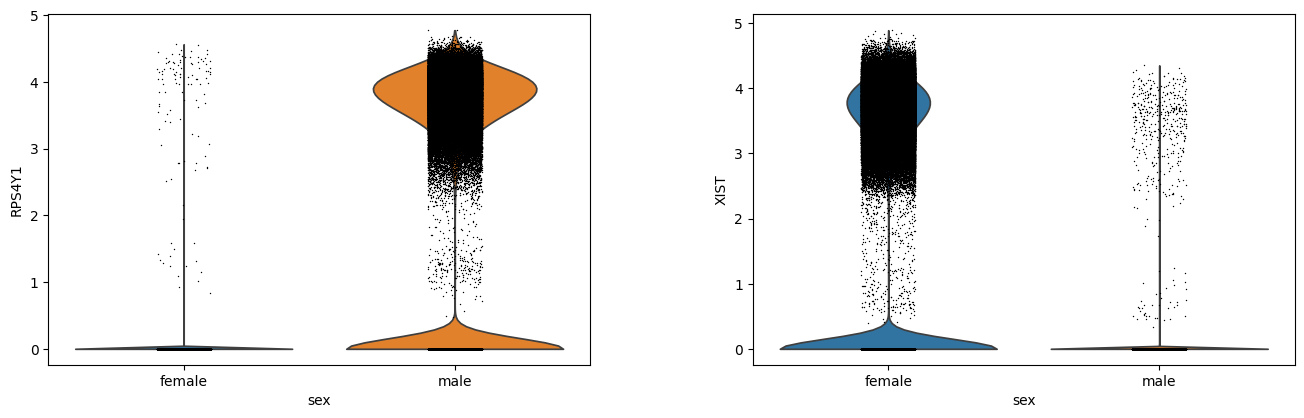

In [86]:
# Now, generate the plot and save it
sc.pl.violin(paired_adata, ["RPS4Y1", "XIST"], use_raw=False, groupby="sex", layer="log1p_norm", save="_xy_check.png")

## Check X and Y chromosome related genes

In [87]:
x_genes =  ["XIST","TSIX"]
y_genes = ["RPS4Y1","RPS4Y2","ZFY","UTY"]

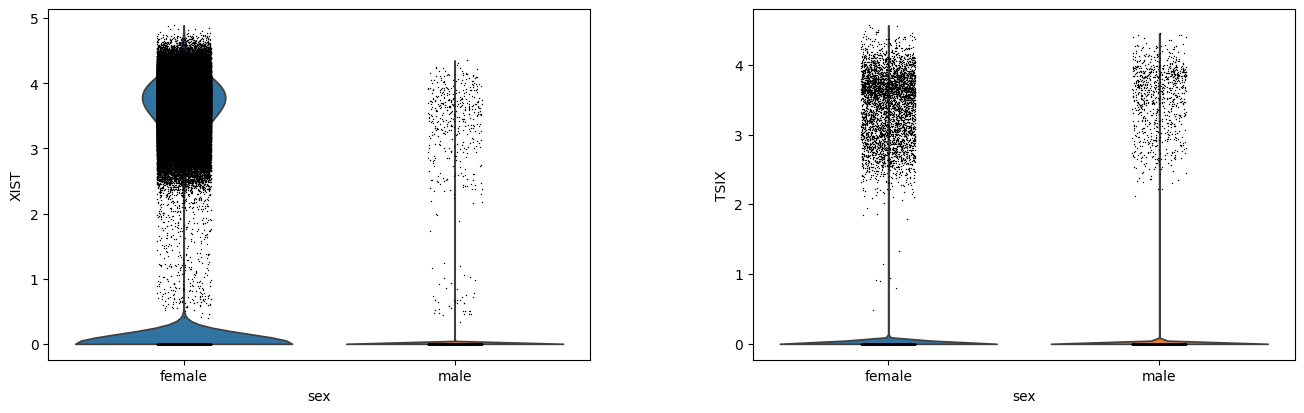

In [88]:
sc.pl.violin(paired_adata, x_genes, use_raw=False, groupby="sex", layer="log1p_norm")

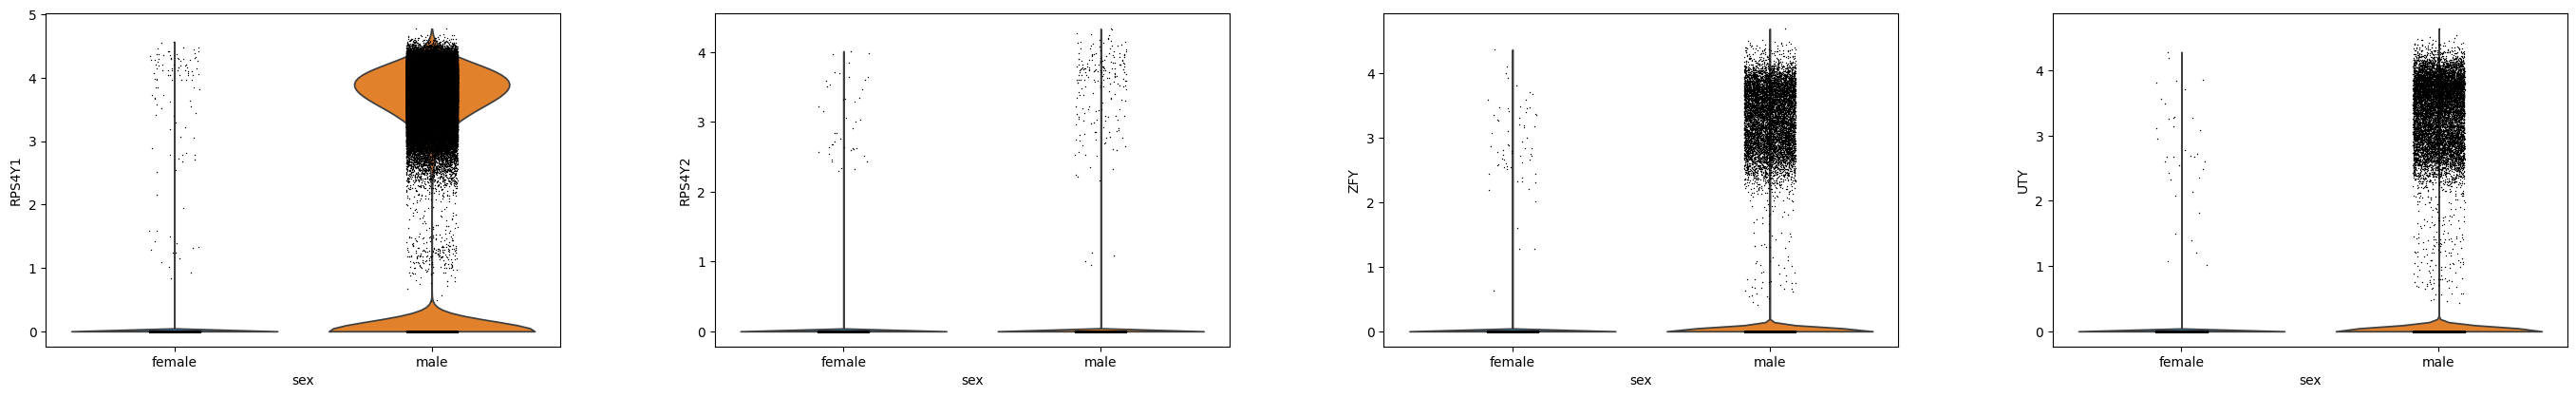

In [89]:
sc.pl.violin(paired_adata, y_genes, use_raw=False, groupby="sex", layer="log1p_norm", save="violin_y.png")

In [90]:
paired_adata.var.index.name = None

In [92]:
paired_adata.write_h5ad("/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/pseudobulk/paired_adata_clean_luad_all_cell_type.h5ad")

In [93]:
#paired_adata = sc.read_h5ad("/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/011_analysis_paired_remove_xy/pseudobulk/paired_adata_clean_luad.h5ad")

In [94]:
paired_adata

AnnData object with n_obs × n_vars = 495832 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

## SUMMARY 
- We used the sex annotation that was given in the respective datasets
- These annotations were confirmed by our analysis, as no Ygenes were in the female cohort. 

### 04.Compute pseudobulk

In [95]:
path = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/pseudobulk"

In [96]:
# Get pseudo-bulk profile
#pdata = dc.get_pseudobulk(
#    paired_adata,
#    sample_col='sample',
#    groups_col='donor_id',
#    layer='count',
#    min_cells=0,
#    min_counts=0
#)

In [97]:
# Get pseudo-bulk profile
pdata = dc.get_pseudobulk(
    paired_adata,
    sample_col="sample",
    groups_col=["cell_type","origin"],
    layer="count",  # layer where raw counts are store in adata
    mode="sum",
    min_cells=0,  # we are setting this to 0 and filter in an explicit, separate step.
    min_counts=0,
)
pdata

AnnData object with n_obs × n_vars = 3439 × 17811
    obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    layers: 'psbulk_props'

In [98]:
pdata.layers["counts"] = pdata.X

In [99]:
scales_counts = sc.pp.normalize_total(pdata, target_sum=None, inplace=False)
# log1p transform
pdata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [100]:
#pdata.obs["age"] = pdata.obs["age"].astype("float64")
pdata.obs["is_primary_data"] = pdata.obs["is_primary_data"].astype(bool)

In [101]:
path

'/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/pseudobulk'

In [111]:
pdata.write_h5ad(f"{path}/pdata_all_cell_type_luad.h5ad")

In [112]:
#pdata = sc.read_h5ad(f"{path}/out/008_analysis_paired_luad/tables/input/pdata.h5ad")

In [113]:
pdata.obs

,sample,cell_type_origin,uicc_stage,ever_smoker,donor_id,origin,dataset,ann_coarse,tumor_stage,study,platform,suspension_type,assay_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,is_primary_data,organism_ontology_term_id,sex_ontology_term_id,tissue_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,psbulk_n_cells,psbulk_counts
He_Fan_2021_N1_B cell_normal_adjacent,He_Fan_2021_N1,B cell_normal_adjacent,I,no,He_Fan_2021_P1,normal_adjacent,He_Fan_2021,B cell,early,He_Fan_2021,10x,cell,EFO:0009899,HsapDv:0000142,MONDO:0005061,unknown,True,NCBITaxon:9606,PATO:0000383,UBERON:0002048,B cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,48-year-old human stage,75.0,102672.0
He_Fan_2021_N2_B cell_normal_adjacent,He_Fan_2021_N2,B cell_normal_adjacent,II,yes,He_Fan_2021_P2,normal_adjacent,He_Fan_2021,B cell,early,He_Fan_2021,10x,cell,EFO:0009899,HsapDv:0000155,MONDO:0005061,unknown,True,NCBITaxon:9606,PATO:0000384,UBERON:0002048,B cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,male,lung,unknown,61-year-old human stage,11.0,18468.0
He_Fan_2021_N3_B cell_normal_adjacent,He_Fan_2021_N3,B cell_normal_adjacent,I,yes,He_Fan_2021_P3,normal_adjacent,He_Fan_2021,B cell,early,He_Fan_2021,10x,cell,EFO:0009899,HsapDv:0000152,MONDO:0005061,unknown,True,NCBITaxon:9606,PATO:0000383,UBERON:0002048,B cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,58-year-old human stage,21.0,26543.0
He_Fan_2021_N4_B cell_normal_adjacent,He_Fan_2021_N4,B cell_normal_adjacent,I,no,He_Fan_2021_P4,normal_adjacent,He_Fan_2021,B cell,early,He_Fan_2021,10x,cell,EFO:0009899,HsapDv:0000169,MONDO:0005061,unknown,True,NCBITaxon:9606,PATO:0000384,UBERON:0002048,B cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,male,lung,unknown,75-year-old human stage,171.0,248874.0
He_Fan_2021_N5_B cell_normal_adjacent,He_Fan_2021_N5,B cell_normal_adjacent,II,no,He_Fan_2021_P5,normal_adjacent,He_Fan_2021,B cell,early,He_Fan_2021,10x,cell,EFO:0009899,HsapDv:0000150,MONDO:0005061,unknown,True,NCBITaxon:9606,PATO:0000383,UBERON:0002048,B cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,56-year-old human stage,38.0,99930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKIM-V-2_P5_tumor_primary_vein endothelial cell_tumor_primary,UKIM-V-2_P5_tumor_primary,vein endothelial cell_tumor_primary,II,yes,UKIM-V-2_P5,tumor_primary,UKIM-V-2,Endothelial cell,early,UKIM-V,BD-Rhapsody,cell,EFO:0700003,HsapDv:0000156,MONDO:0005061,unknown,True,NCBITaxon:9606,PATO:0000383,UBERON:0002048,vein endothelial cell,BD Rhapsody Whole Transcriptome Analysis,lung adenocarcinoma,Homo sapiens,female,lung,unknown,62-year-old human stage,2.0,8749.0
UKIM-V-2_P7_tumor_primary_vein endothelial cell_tumor_primary,UKIM-V-2_P7_tumor_primary,vein endothelial cell_tumor_primary,III,yes,UKIM-V-2_P7,tumor_primary,UKIM-V-2,Endothelial cell,advanced,UKIM-V,BD-Rhapsody,cell,EFO:0700003,HsapDv:0000163,MONDO:0005061,unknown,True,NCBITaxon:9606,PATO:0000383,UBERON:0002048,vein endothelial cell,BD Rhapsody Whole Transcriptome Analysis,lung adenocarcinoma,Homo sapiens,female,lung,unknown,69-year-old human stage,1.0,5027.0
UKIM-V-2_P9_tumor_primary_vein endothelial cell_tumor_primary,UKIM-V-2_P9_tumor_primary,vein endothelial cell_tumor_primary,I,yes,UKIM-V-2_P9,tumor_primary,UKIM-V-2,Endothelial cell,early,UKIM-V,BD-Rhapsody,cell,EFO:0700003,HsapDv:0000163,MONDO:0005061,unknown,True,NCBITaxon:9606,PATO:0000384,UBERON:0002048,vein endothelial cell,BD Rhapsody Whole Transcriptome Analysis,lung adenocarcinoma,Homo sapiens,male,lung,unknown,69-year-old human stage,11.0,59192.0
UKIM-V_P1_tumor_primary_vein endothelial cell_tumor_primary,UKIM-V_P1_tumor_primary,vein endothelial cell_tumor_primary,I,yes,UKIM-V_P1,tumor_primary,UKIM-V,Endothelial cell,early,UKIM-V,BD-Rhapsody,cell,EFO:0700003,HsapDv:00

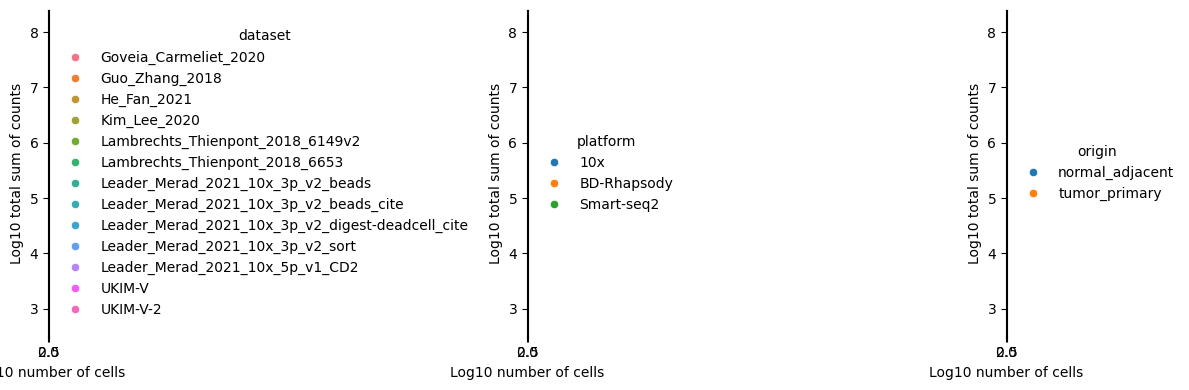

In [114]:
dc.plot_psbulk_samples(pdata, groupby=['dataset', 'platform',"origin"], figsize=(12, 4))

In [115]:
cell_types = pdata.obs["cell_type"].unique()

In [116]:
cell_types

['B cell', 'CD1c-positive myeloid dendritic cell', 'CD4+ T cell', 'CD8+ T cell', 'bronchus fibroblast of lung', ..., 'smooth muscle cell', 'stromal cell', 'type I pneumocyte', 'type II pneumocyte', 'vein endothelial cell']
Length: 31
Categories (31, object): ['B cell', 'CD1c-positive myeloid dendritic cell', 'CD4+ T cell', 'CD8+ T cell', ..., 'stromal cell', 'type I pneumocyte', 'type II pneumocyte', 'vein endothelial cell']

In [117]:
pdata_by_cell_type = {}
for ct in cell_types:
    pb = pdata[pdata.obs["cell_type"] == ct, :].copy()
    if pb.obs["origin"].nunique() <= 1:
        print(f"Cell type {ct} does not have samples in all groups")
    else:
        pdata_by_cell_type[ct] = pb

In [118]:
pdata_by_cell_type

{'B cell': AnnData object with n_obs × n_vars = 129 × 17811
     obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
     var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
     layers: 'psbulk_props', 'counts', 'log1p_norm',
 'CD1c-positive myeloid dendritic cell': AnnData object with n_obs × n_vars = 133 × 17811
     obs: 'sample', 'cell_type_origin', 'uicc_stage'

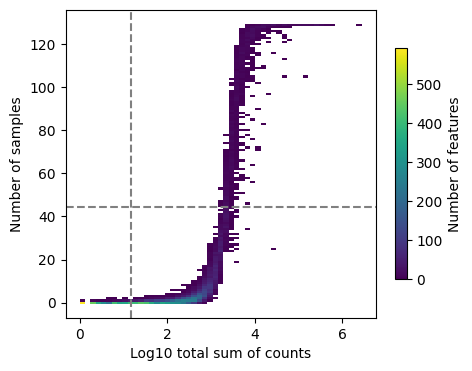

In [119]:
dc.plot_filter_by_expr(
    pdata_by_cell_type['B cell'],
    group="origin",
    min_count=10,
    min_total_count=15,
)

In [120]:
for tmp_pdata in pdata_by_cell_type.values():
    dc.filter_by_expr(
        tmp_pdata,
        group="origin",
        min_count=10,
        min_total_count=15,
    )

In [121]:
from pathlib import Path
import re


In [122]:
deseq_results = Path("/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all")

In [123]:
def _create_prefix(cell_type):
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", cell_type)
    prefix = deseq_results / "tumor_vs_normal" / ct_sanitized
    prefix.mkdir(parents=True, exist_ok=True)
    return prefix

In [124]:
def _create_prefix_mf(cell_type):
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", cell_type)
    prefix = deseq_results / "male_vs_female" / ct_sanitized
    prefix.mkdir(parents=True, exist_ok=True)
    return prefix

In [125]:
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix(ct)
    print(prefix)

/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/tumor_vs_normal/B_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/tumor_vs_normal/CD1c_positive_myeloid_dendritic_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/tumor_vs_normal/CD4_T_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/tumor_vs_normal/CD8_T_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/tumor_vs_normal/bronchus_fibroblast_of_lung
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/tumor_vs_normal/capillary_endothelial_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/tumor_vs_normal/classical_monocyte
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/tumor_vs_nor

In [126]:
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix_mf(ct)
    print(prefix)

/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/male_vs_female/B_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/male_vs_female/CD1c_positive_myeloid_dendritic_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/male_vs_female/CD4_T_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/male_vs_female/CD8_T_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/male_vs_female/bronchus_fibroblast_of_lung
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/male_vs_female/capillary_endothelial_cell
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/male_vs_female/classical_monocyte
/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/deseq2_out/pb_cell_type_all/male_vs_female/club

In [127]:
### Samplesheet
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix(ct)
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", ct)

#for index, dataframe in enumerate(pdata_list):
    
    # Perform the operations
    samplesheet = tmp_pdata.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{prefix}/samplesheet_{ct_sanitized}.csv", index=False)
    samplesheet.to_csv(f"{prefix}/samplesheet_{ct_sanitized}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = tmp_pdata.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/counts_{ct_sanitized}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(tmp_pdata.layers["log1p_norm"], 
        tmp_pdata.to_df().index, 
        tmp_pdata.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/log1p_norm_counts_{ct_sanitized}.csv")    

In [128]:
### Samplesheet
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix(ct)
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", ct)

#for index, dataframe in enumerate(pdata_list):
    
    # Perform the operations
    tmp_pdata_female = tmp_pdata[tmp_pdata.obs["sex"]=="female"]
    samplesheet = tmp_pdata_female.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{prefix}/samplesheet_female_{ct_sanitized}.csv", index=False)
    samplesheet.to_csv(f"{prefix}/samplesheet_female_{ct_sanitized}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = tmp_pdata_female.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/counts_female_{ct_sanitized}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(tmp_pdata_female.layers["log1p_norm"], 
        tmp_pdata_female.to_df().index, 
        tmp_pdata_female.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/log1p_norm_counts_female_{ct_sanitized}.csv")    

In [129]:
### Samplesheet
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix(ct)
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", ct)

#for index, dataframe in enumerate(pdata_list):
    
    # Perform the operations
    tmp_pdata_male = tmp_pdata[tmp_pdata.obs["sex"]=="male"]
    samplesheet = tmp_pdata_male.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{prefix}/samplesheet_male_{ct_sanitized}.csv", index=False)
    samplesheet.to_csv(f"{prefix}/samplesheet_male_{ct_sanitized}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = tmp_pdata_male.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/counts_male_{ct_sanitized}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(tmp_pdata_male.layers["log1p_norm"], 
        tmp_pdata_male.to_df().index, 
        tmp_pdata_male.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/log1p_norm_counts_male_{ct_sanitized}.csv")    

In [130]:
### Samplesheet
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix_mf(ct)
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", ct)

#for index, dataframe in enumerate(pdata_list):
    
    # Perform the operations
    tmp_pdata_normal = tmp_pdata[tmp_pdata.obs["origin"]=="normal_adjacent"]
    samplesheet = tmp_pdata_normal.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{prefix}/samplesheet_normal_{ct_sanitized}.csv", index=False)
    samplesheet.to_csv(f"{prefix}/samplesheet_normal_{ct_sanitized}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = tmp_pdata_normal.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/counts_normal_{ct_sanitized}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(tmp_pdata_normal.layers["log1p_norm"], 
        tmp_pdata_normal.to_df().index, 
        tmp_pdata_normal.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/log1p_norm_counts_normal_{ct_sanitized}.csv")    

In [131]:
### Samplesheet
for ct, tmp_pdata in pdata_by_cell_type.items():
    prefix = _create_prefix_mf(ct)
    ct_sanitized = re.sub("[^0-9a-zA-Z]+", "_", ct)

#for index, dataframe in enumerate(pdata_list):
    
    # Perform the operations
    tmp_pdata_tumor = tmp_pdata[tmp_pdata.obs["origin"]=="tumor_primary"]
    samplesheet = tmp_pdata_tumor.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{prefix}/samplesheet_tumor_{ct_sanitized}.csv", index=False)
    samplesheet.to_csv(f"{prefix}/samplesheet_tumor_{ct_sanitized}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = tmp_pdata_tumor.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/counts_tumor_{ct_sanitized}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(tmp_pdata_tumor.layers["log1p_norm"], 
        tmp_pdata_tumor.to_df().index, 
        tmp_pdata_tumor.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{prefix}/log1p_norm_counts_tumor_{ct_sanitized}.csv")    

In [132]:
#pdata = pdata[pdata.obs["dataset"]!="Guo_Zhang_2018"] ## SMART SEQ 

In [133]:
#pdata

In [134]:
#dc.plot_psbulk_samples(pdata, groupby=['dataset', 'platform'], figsize=(12, 4))

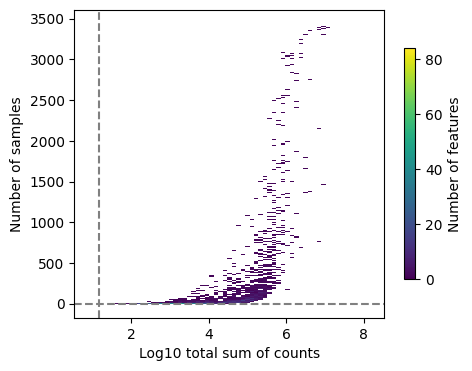

In [135]:
dc.plot_filter_by_expr(pdata, group='sample', min_count=10, min_total_count=15)

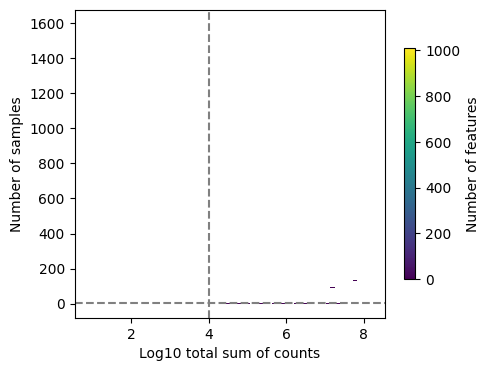

In [136]:
dc.plot_filter_by_expr(pdata, group='sample', large_n=100,min_prop=0.9, min_count=5000, min_total_count=10000)

I set this threshold for the DS analysis to avoid havinh zero-inflated data

In [137]:
# Obtain genes that pass the thresholds 
genes = dc.filter_by_expr(pdata, group='sample', min_count=5000, min_total_count=10000)

# Filter by these genes
pdata = pdata[:, genes].copy()
pdata

AnnData object with n_obs × n_vars = 3439 × 33
    obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    layers: 'psbulk_props', 'counts', 'log1p_norm'

In [138]:
pdata.layers["counts"] = pdata.X

In [139]:
scales_counts = sc.pp.normalize_total(pdata, target_sum=None, inplace=False)
# log1p transform
pdata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [140]:
pdata

AnnData object with n_obs × n_vars = 3439 × 33
    obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    layers: 'psbulk_props', 'counts', 'log1p_norm'

In [141]:
pdata.write_h5ad("/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/pseudobulk/pdata_luad_all_cell_type.h5ad")

In [142]:
### Samplesheet
samplesheet = pdata.obs.copy()
samplesheet["sample"]=samplesheet.index
samplesheet.reset_index(inplace=True)

In [143]:
samplesheet.to_csv(f"{path}samplesheet.csv", index=False)
samplesheet.to_csv(f"{path}samplesheet.tsv", index=False, sep = "\t")

In [144]:
bulk_df = pdata.to_df().T

In [145]:
### Raw counts
bulk_df = pdata.to_df().T
#bulk_df["gene_id"]=bulk_df.index
bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")

In [146]:
bulk_df.to_csv(f"{path}counts.csv")    

In [147]:
### log1p_norm counts
pdata_log1p_norm = pd.DataFrame(pdata.layers["log1p_norm"], 
    pdata.to_df().index, 
    pdata.to_df().columns)
bulk_df = pdata_log1p_norm.T
#bulk_df["gene_id"]=bulk_df.index'
bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
bulk_df.to_csv(f"{path}log1p_norm_counts.csv")    

### 0.4 Create counts and samplesheet independent for tumor and normal for DESEQ2 

In [148]:
pdata_normal = pdata[pdata.obs["origin"]=="normal_adjacent"]
pdata_tumor = pdata[pdata.obs["origin"]=="tumor_primary"]

In [149]:
pdata_normal

View of AnnData object with n_obs × n_vars = 1647 × 33
    obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    layers: 'psbulk_props', 'counts', 'log1p_norm'

In [150]:
pdata_list = [pdata_normal,pdata_tumor]
pdata_list_name = ["normal","tumor"]

for index, dataframe in enumerate(pdata_list):
    print(pdata_list_name[index])
    # Perform the operations
    samplesheet = dataframe.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{path}samplesheet_{pdata_list_name[index]}.csv", index=False)
    samplesheet.to_csv(f"{path}samplesheet_{pdata_list_name[index]}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = dataframe.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{path}counts_{pdata_list_name[index]}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(dataframe.layers["log1p_norm"], 
        dataframe.to_df().index, 
        dataframe.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{path}/log1p_norm_counts_{pdata_list_name[index]}.csv")    

normal
tumor


### 0.4 Create counts and samplesheet independent for male and female for DESEQ2 

In [151]:
pdata_male = pdata[pdata.obs["sex"]=="male"]
pdata_female = pdata[pdata.obs["sex"]=="female"]

In [152]:
pdata_male

View of AnnData object with n_obs × n_vars = 1447 × 33
    obs: 'sample', 'cell_type_origin', 'uicc_stage', 'ever_smoker', 'donor_id', 'origin', 'dataset', 'ann_coarse', 'tumor_stage', 'study', 'platform', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    layers: 'psbulk_props', 'counts', 'log1p_norm'

In [153]:
pdata_list = [pdata_male,pdata_female]
pdata_list_name = ["male","female"]

for index, dataframe in enumerate(pdata_list):
    print(pdata_list_name[index])
    # Perform the operations
    samplesheet = dataframe.obs.copy()
    samplesheet["sample"] = samplesheet.index
    samplesheet.reset_index(inplace=True)
  
    samplesheet.to_csv(f"{path}samplesheet_{pdata_list_name[index]}.csv", index=False)
    samplesheet.to_csv(f"{path}samplesheet_{pdata_list_name[index]}.tsv", index=False, sep="\t")


    ### Raw counts
    bulk_df = dataframe.to_df().T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{path}counts_{pdata_list_name[index]}.csv")  
    ### log1p_norm counts
    pdata_log1p_norm = pd.DataFrame(dataframe.layers["log1p_norm"], 
        dataframe.to_df().index, 
        dataframe.to_df().columns)
    bulk_df = pdata_log1p_norm.T
    #bulk_df["gene_id"]=bulk_df.index
    bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")
    bulk_df.to_csv(f"{path}/log1p_norm_counts_{pdata_list_name[index]}.csv")    

male
female
